In [2]:
#import conda
import tqdm as notebook_tqdm
import shap
import numpy as np
import xgboost

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from interpret.glassbox import ExplainableBoostingClassifier
from interpret.privacy import DPExplainableBoostingClassifier, DPExplainableBoostingRegressor
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
from interpret.glassbox import ClassificationTree
from interpret import show
from sklearn.metrics import accuracy_score

In [3]:
# generate synthetic dataset
X,y = shap.datasets.diabetes()
feature_names = list(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Accuracy: 0.00%


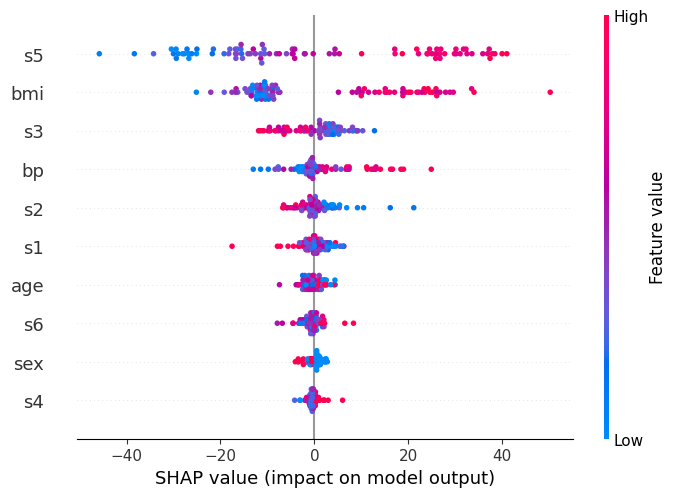

In [4]:
# Train the model
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_train, label=y_train), 100)

# Evaluate the model
y_pred = model.predict(xgboost.DMatrix(X_test, label=y_test))
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Explain the model's predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Create a beeswarm plot
shap.plots.beeswarm(shap_values)

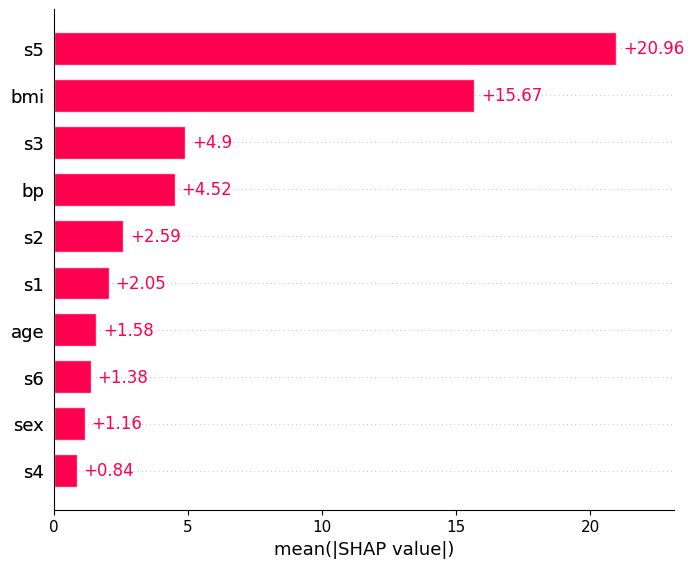

In [5]:
shap.plots.bar(shap_values)

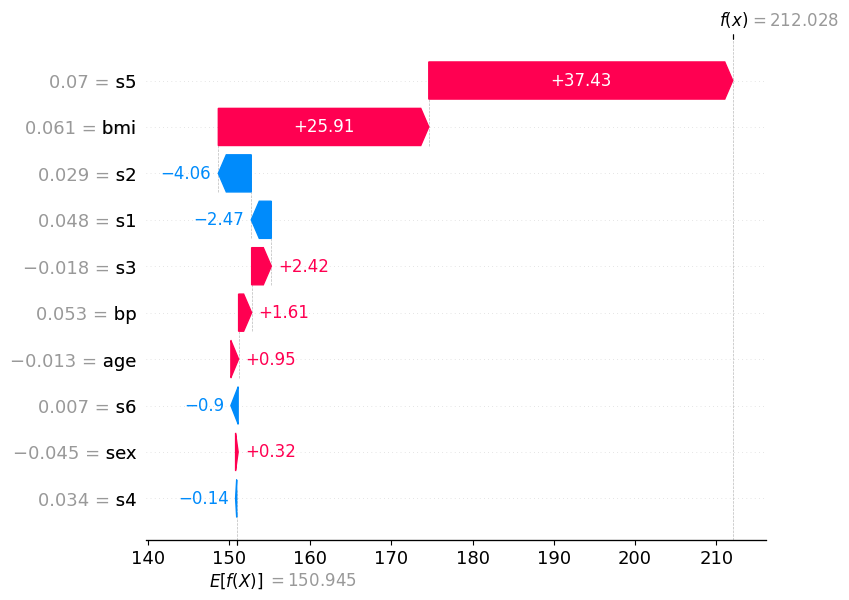

In [6]:
shap.plots.waterfall(shap_values[1])

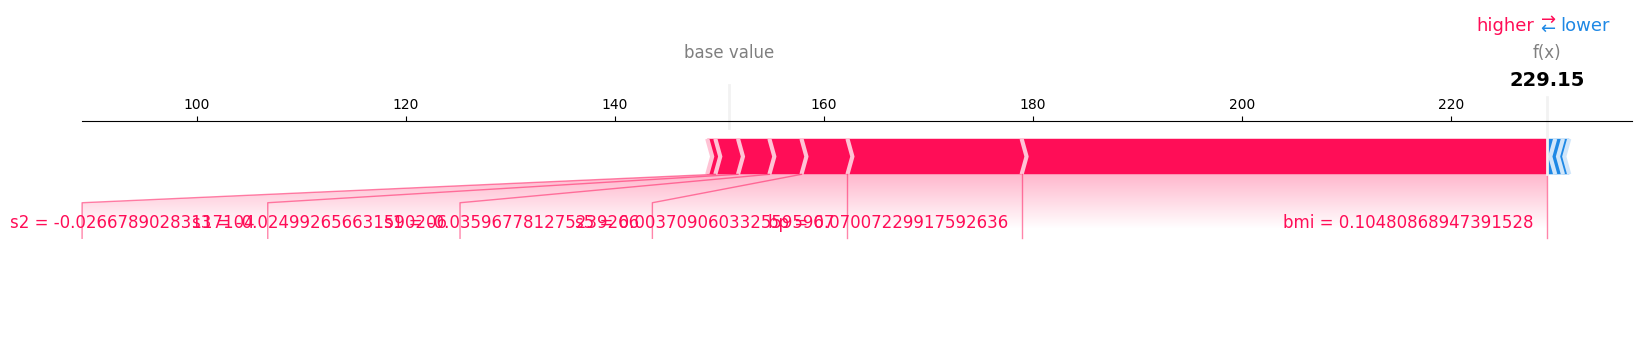

In [7]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0], matplotlib=True, feature_names=feature_names)

In [8]:
# visualize all the training set predictions
shap.plots.initjs()
shap.plots.force(shap_values)

In [9]:
# train the model
model = ExplainableBoostingClassifier()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

# make a prediction
print(score)


# explain the prediction
explanation = model.explain_global()

dp_ebm = ExplainableBoostingClassifier() # Specify privacy parameters

dp_ebm.fit(X_train, y_train)
show(dp_ebm.explain_global())

/opt/homebrew/lib/python3.11/site-packages/interpret/glassbox/_ebm/_utils.py:381: UserWarning: Too few samples per class, adapting test size to guarantee 1 sample per class.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/interpret/glassbox/_ebm/_ebm.py:995: UserWarning: Detected multiclass problem. Forcing interactions to 0. Multiclass interactions only have local explanations. They are not currently displayed in the global explanation visualizations. Set interactions=0 to disable this warning. If you still want multiclass interactions, this API accepts a list, and the measure_interactions function can be used to detect them.
  warn(


0.0


/opt/homebrew/lib/python3.11/site-packages/interpret/glassbox/_ebm/_utils.py:381: UserWarning: Too few samples per class, adapting test size to guarantee 1 sample per class.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/interpret/glassbox/_ebm/_ebm.py:995: UserWarning: Detected multiclass problem. Forcing interactions to 0. Multiclass interactions only have local explanations. They are not currently displayed in the global explanation visualizations. Set interactions=0 to disable this warning. If you still want multiclass interactions, this API accepts a list, and the measure_interactions function can be used to detect them.
  warn(


<!-- http://127.0.0.1:7112/6230588304/ -->

In [10]:
dt = ClassificationTree(random_state=1)
dt.fit(X_train, y_train)
score = dt.score(X_test, y_test)

# make a prediction
print(score)
dt_global = dt.explain_global()
show(dt_global)

dt_local = dt.explain_local(X_test[:50], y_test[:50])
show(dt_local)

0.0


<!-- http://127.0.0.1:7771/6294907792/ -->

<!-- http://127.0.0.1:7771/6301966864/ -->

Mean Squared Error: 2952.0105887640448


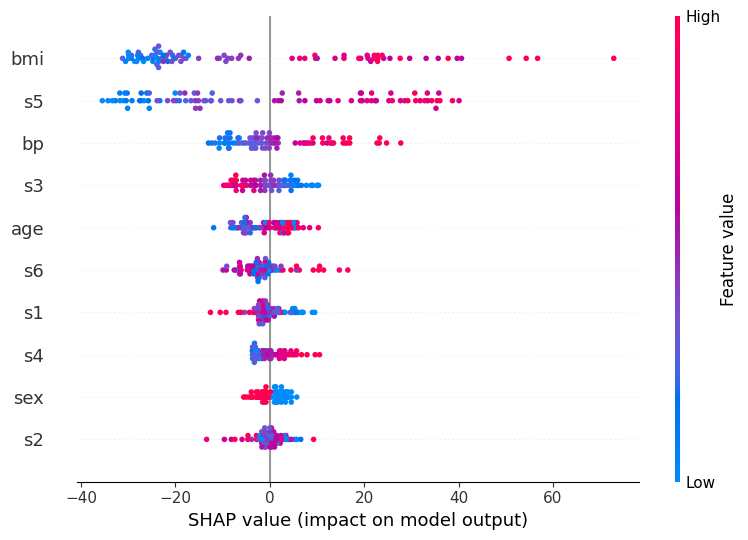

        age       sex        bmi         bp         s1        s2        s3  \
0  2.929977  1.229046  -6.158312  -1.519932 -12.575051 -2.585778 -3.396495   
1  1.200938  1.254932  19.287869  12.135757   1.763445  0.126135  0.252123   
2  4.106113 -1.200693 -11.082107  -0.120925 -10.511020 -1.703199 -8.197427   
3  3.642325  0.988021  18.864341  23.175282  -2.136857  0.697591  9.034662   
4 -3.893176 -5.532904 -23.551108  -0.080045  -1.380529  2.888767 -0.944876   

         s4         s5         s6  Actual  Predicted  
0  2.980063  12.357218  -2.260938   219.0     144.00  
1 -3.561079 -13.957089  -0.573230    70.0     171.58  
2 -1.485441  30.709297  -2.914798   202.0     150.72  
3  6.726761  30.902805  10.344869   230.0     253.71  
4  3.099797 -15.775296  -0.760830   111.0     107.19  


In [16]:
import shap
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest regressor on the data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Initialize a SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values
shap_values = explainer(X_test, check_additivity=False)

# Plot the SHAP values
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

# Create a SHAP summary dataframe
shap_df = pd.DataFrame(shap_values.values, columns=feature_names)

# Add the actual target values and predictions to the dataframe
shap_df['Actual'] = y_test
shap_df['Predicted'] = y_pred

# Display the SHAP summary dataframe
print(shap_df.head())

# Save the SHAP summary dataframe to a CSV file
shap_df.to_csv('shap_summary.csv', index=False)


Mean Squared Error: 2952.0105887640448


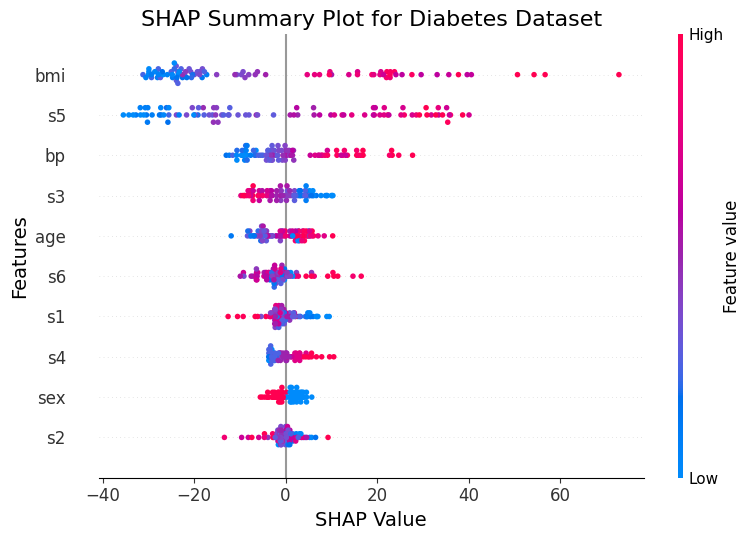

In [20]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest regressor on the data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Initialize a SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values
shap_values = explainer(X_test, check_additivity=False)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=False)

# Customize the plot appearance
plt.title('SHAP Summary Plot for Diabetes Dataset', fontsize=16)
plt.xlabel('SHAP Value', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the plot
plt.savefig('shap_summary_plot.png', dpi=300)

# Show the plot
plt.show()


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
classes = ['Class 0', 'Class 1', 'Class 2']

# Create a confusion matrix display
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Plot confusion matrix
cmd.plot(cmap=plt.cm.Blues)

# Customize the plot appearance
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

<Figure size 800x600 with 0 Axes>

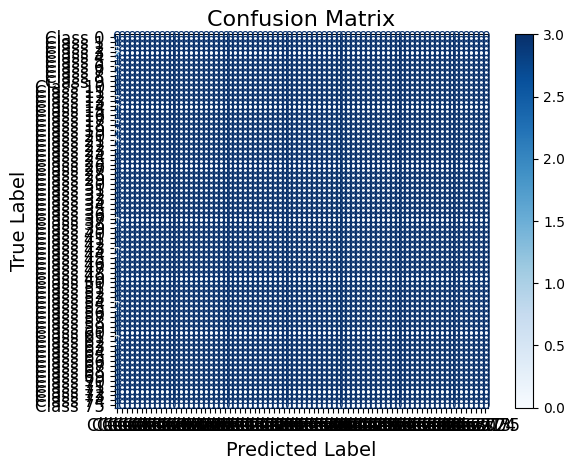

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming y_pred contains continuous predictions
threshold = 0.5  # Define a threshold for classification

# Convert continuous predictions to binary class labels
y_pred_binary = np.where(y_pred > threshold, 1, 0)

# Now y_pred_binary contains discrete class labels based on the threshold

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Get the number of classes
num_classes = cm.shape[0]

# Define class labels
classes = ['Class {}'.format(i) for i in range(num_classes)]

# Create a confusion matrix display
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Plot confusion matrix
cmd.plot(cmap=plt.cm.Blues)

# Customize the plot appearance
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()
